In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade

## Modelos de regresión con variables categóricas

Los modelos lineales que vimos antes
  - Solo pueden trabajar con variables dependientes e independientes continuas.

Existen modelos alternartivos para trabajar con variables categóricas
  - En las variables independientes
  - En las variables dependientes

## Análisis de Regresión Logística con variables independientes categóricas

Es posible hacer un modelo de regresión lineal con variables independientes
categóricas.

Tenemos que modificar los datos y el modelo, para que las variables categóricas
pueden ser incluidas.

- Si la variable es dicotómica:
  - Se modifica su valor para sea
    - 1 para una categroría
    - 0 para la otra categoria.
- Si la variable tiene tres o mas valores:
  - Se incluyen en el modelo
    - Tantas variables como categorias
    - Cada variable puede tener valores 0 o 1


In [ ]:
from rdatasets import data, descr

survey = data("MASS", "survey")
survey.dropna(inplace=True)
print(survey)
print(descr("MASS", "survey"))

Vamos a tratar de predecir la altura:
  - Por el sexo la persona
  - La frecuencia de fumar
  - La frecuencia de ejercitación


In [ ]:
import pandas as pd
survey_mod = survey[["Height", "Sex", "Smoke", "Exer"]]

survey_mod = pd.get_dummies(survey_mod)
# survey_mod.drop(columns=["Sex_Male"], inplace = True)
survey_mod

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np


train_frac = 0.7
train_elems = int(round(train_frac * len(survey_mod)))
print(f"Selecciono {train_elems} elementos para entrenar")
print(f"Selecciono {len(survey_mod)-train_elems} elementos para testear")

suffled_indexes = survey_mod.index.to_numpy()
np.random.shuffle(suffled_indexes)
train_indexes = suffled_indexes[:train_elems]
test_indexes = suffled_indexes[train_elems:]

survey_train = survey_mod.loc[train_indexes,:]
survey_test = survey_mod.loc[test_indexes,:]

exog = survey_train.drop(columns=["Height"])
exog = sm.add_constant(exog)
exog

regmod = sm.OLS(
  endog = survey_train["Height"],
  exog = exog
)
fitted = regmod.fit()
fitted.params

test = survey_test.drop(columns=["Height"])
test = sm.add_constant(test)
test

test_predicted = fitted.predict(test)
test_predicted.name = "Predicted"
test_predicted

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

plt.scatter(
  x = survey_test["Height"],
  y = test_predicted
)
plt.ylabel("Altura predicha")
plt.xlabel("Altura real")

pearson_corr = st.pearsonr(survey_test["Height"], test_predicted)
pearson_corr


fitted2 = sm.OLS(
  survey_test["Height"],
  sm.add_constant(test_predicted)
).fit()
x = np.linspace(min(survey_test["Height"]), max(survey_test["Height"]), 100)
plt.plot(
  x,
  fitted2.params @ (sm.add_constant(x)).T,
  color = "Red"
)
plt.text(155, 190, f"$\\rho = {pearson_corr[0]:0.3f}$")


In [ ]:
fitted.params

## Modelo lineal con una variable dependiente con varias categorías

Para utilizar un modelo lineal para prededir

- Una variable dependiente
  - Con varias categorías
- Se contruyen varios modelos logisticos
  - Si hay N categorias,
  - Se generan N modelos.
  - Cada uno de ellos predice cada variable.
  - Finalmente,
    - Se toma el valor de la mayor predicción individual

Queremos predecir la ciudad de residencia a partir de.
- Ingreso mensual.
- horas de viaje diario.
- Edad
- Cantidad de hijos.

In [171]:
c_data = {
  "ingreso":{
    "623":2328,"68":3418,"456":2650,"519":2653,"534":2084,"401":2181,"285":3004,
    "472":2371,"675":3210,"214":2921,"218":2645,"717":2549,"435":2616,"866":2907,
    "449":2445,"34":2211,"736":2213,"378":2683,"382":2459,"622":2797,"30":2825,
    "439":2745,"815":2868,"870":2392,"980":2643,"522":2534,"667":1924,"875":2886,
    "967":2475,"785":1947,"654":2762,"373":2545,"656":3120,"591":2782,"660":2234,
    "882":1992,"488":2448,"497":2624,"468":2333,"289":2740,"520":2044,"154":2721,
    "416":2134,"768":2309,"989":2530,"180":2085,"506":2377,"188":2715,"510":2154,
    "174":2346,"703":2536,"175":2586,"292":2525,"592":2581,"981":2539,"561":2909,
    "258":2619,"371":2747,"341":2483,"23":2536,"150":2420,"982":2482,"407":2707,
    "299":2237,"627":2031,"492":2473,"807":2469,"294":2564,"489":2471,"642":2237,
    "742":2299,"18":2631,"910":2395,"593":2948,"173":2317,"113":2207,"152":2464,
    "222":2747,"894":2586,"515":2847,"287":2164,"475":2287,"555":2094,"211":2862,
    "302":2673,"839":2293,"862":2372,"942":2593,"861":2380,"804":2485,"231":2347,
    "93":1972,"950":1806,"61":2225,"140":3259,"385":2291,"860":2463,"905":2645,
    "987":2582,"358":2165
  },
  "hijos":{
    "623":1,"68":5,"456":5,"519":5,"534":4,"401":5,"285":0,"472":4,"675":2,"214":3,
    "218":1,"717":3,"435":2,"866":4,"449":4,"34":3,"736":3,"378":2,"382":5,"622":2,
    "30":0,"439":2,"815":2,"870":3,"980":3,"522":4,"667":0,"875":2,"967":0,"785":0,
    "654":1,"373":4,"656":1,"591":4,"660":0,"882":4,"488":4,"497":0,"468":2,"289":3,
    "520":4,"154":2,"416":5,"768":3,"989":2,"180":2,"506":5,"188":0,"510":1,"174":5,
    "703":4,"175":2,"292":4,"592":3,"981":0,"561":1,"258":5,"371":2,"341":3,"23":2,
    "150":3,"982":4,"407":1,"299":0,"627":5,"492":3,"807":1,"294":1,"489":0,"642":4,
    "742":3,"18":0,"910":1,"593":0,"173":4,"113":1,"152":0,"222":4,"894":0,"515":3,
    "287":4,"475":2,"555":4,"211":5,"302":2,"839":1,"862":1,"942":2,"861":0,"804":3,
    "231":2,"93":3,"950":4,"61":4,"140":4,"385":2,"860":2,"905":2,"987":0,"358":1
  },
  "edad":{
    "623":38,"68":58,"456":47,"519":34,"534":44,"401":59,"285":67,"472":39,"675":43,
    "214":51,"218":47,"717":53,"435":49,"866":44,"449":52,"34":58,"736":48,"378":41,
    "382":57,"622":62,"30":66,"439":44,"815":39,"870":50,"980":51,"522":69,"667":50,
    "875":50,"967":59,"785":57,"654":50,"373":43,"656":49,"591":67,"660":62,"882":46,
    "488":56,"497":41,"468":55,"289":36,"520":52,"154":48,"416":42,"768":59,"989":47,
    "180":38,"506":56,"188":54,"510":65,"174":51,"703":53,"175":51,"292":56,"592":64,
    "981":48,"561":38,"258":43,"371":57,"341":55,"23":61,"150":59,"982":37,"407":39,
    "299":54,"627":68,"492":44,"807":48,"294":56,"489":46,"642":39,"742":61,"18":49,
    "910":47,"593":40,"173":62,"113":58,"152":54,"222":57,"894":48,"515":52,"287":47,
    "475":67,"555":41,"211":59,"302":40,"839":66,"862":53,"942":68,"861":58,"804":51,
    "231":49,"93":51,"950":60,"61":61,"140":47,"385":56,"860":50,"905":56,"987":40,
    "358":30
  },
  "horas_viaje":{
    "623":1.3077073133,"68":1.7057864113,"456":1.7361710411,"519":2.1592643379,
    "534":2.4231186384,"401":1.5415090428,"285":1.2007395476,"472":2.1042530608,
    "675":2.0282959365,"214":2.4972195066,"218":2.7112960592,"717":1.8239538714,
    "435":1.843082212,"866":2.1986395763,"449":2.2397828663,"34":1.1100948295,
    "736":1.299147434,"378":1.7776278184,"382":2.6780874672,"622":2.073778304,
    "30":2.0932151464,"439":2.2462378205,"815":1.456296133,"870":1.3880009599,
    "980":3.1395515936,"522":1.9111122808,"667":1.6907408609,"875":2.9073974231,
    "967":2.370960947,"785":0.9868502349,"654":2.1159957674,"373":1.5522843595,
    "656":2.1458480662,"591":1.2019193007,"660":1.814313605,"882":1.0206625751,
    "488":2.4212479693,"497":2.588476069,"468":1.3462991359,"289":1.5794437025,
    "520":1.473821603,"154":2.1939802745,"416":1.767307562,"768":1.1063891301,
    "989":1.4952199262,"180":1.9114397681,"506":2.1758224153,"188":1.8179933553,
    "510":2.1111104294,"174":1.845344654,"703":2.6364768067,"175":1.5133104673,
    "292":1.8370883252,"592":1.8975312625,"981":1.6820953428,"561":1.5365485729,
    "258":3.5611411945,"371":2.5092035582,"341":2.5849920666,"23":2.5235842879,
    "150":2.9403742649,"982":1.9134283584,"407":1.6487827105,"299":1.5788059964,
    "627":1.5026386033,"492":2.5152437957,"807":2.2370414691,"294":0.8261472401,
    "489":1.4548265614,"642":1.3803250516,"742":1.4127980333,"18":0.6359467871,
    "910":1.1310254729,"593":2.0237713173,"173":0.5746990368,"113":1.2332306696,
    "152":2.4136000374,"222":2.1310144808,"894":2.5390128857,"515":1.7622112712,
    "287":1.7499975211,"475":2.4137816498,"555":2.0229599479,"211":3.4705978509,
    "302":3.1902972182,"839":2.4637653567,"862":1.0528701327,"942":1.8112311216,
    "861":1.9290635632,"804":2.5901964205,"231":1.9076518576,"93":1.6033935115,
    "950":3.0840522907,"61":3.0414783704,"140":1.9050864622,"385":1.9492495705,
    "860":2.7768182934,"905":2.9796189029,"987":3.2822092477,"358":1.9504032354
  },
  "lugar":{
    "623":"Newark","68":"NewYork","456":"WestWood","519":"NewYork","534":"NewYork",
    "401":"NewYork","285":"Newark","472":"NewYork","675":"Newark","214":"NewYork",
    "218":"WestWood","717":"NewYork","435":"WestWood","866":"NewYork","449":"NewYork",
    "34":"WestWood","736":"WestWood","378":"Newark","382":"NewYork","622":"WestWood",
    "30":"Newark","439":"NewYork","815":"Newark","870":"NewYork","980":"NewYork",
    "522":"WestWood","667":"Newark","875":"NewYork","967":"WestWood","785":"Newark",
    "654":"Newark","373":"NewYork","656":"Newark","591":"WestWood","660":"Newark",
    "882":"NewYork","488":"NewYork","497":"Newark","468":"WestWood","289":"WestWood",
    "520":"NewYork","154":"WestWood","416":"NewYork","768":"WestWood","989":"WestWood",
    "180":"Newark","506":"NewYork","188":"Newark","510":"WestWood","174":"NewYork",
    "703":"NewYork","175":"Newark","292":"NewYork","592":"WestWood","981":"Newark",
    "561":"Newark","258":"NewYork","371":"NewYork","341":"WestWood","23":"WestWood",
    "150":"NewYork","982":"WestWood","407":"Newark","299":"Newark","627":"WestWood",
    "492":"WestWood","807":"WestWood","294":"Newark","489":"Newark","642":"WestWood",
    "742":"NewYork","18":"Newark","910":"WestWood","593":"Newark","173":"NewYork",
    "113":"Newark","152":"Newark","222":"WestWood","894":"Newark","515":"WestWood",
    "287":"NewYork","475":"WestWood","555":"NewYork","211":"NewYork","302":"WestWood",
    "839":"WestWood","862":"Newark","942":"WestWood","861":"Newark","804":"NewYork",
    "231":"NewYork","93":"WestWood","950":"NewYork","61":"NewYork","140":"NewYork",
    "385":"WestWood","860":"WestWood","905":"Newark","987":"Newark","358":"Newark"
  }
}
c_data = pd.DataFrame(c_data)
outputs = c_data["lugar"].unique()

In [172]:
c_data

,ingreso,hijos,edad,horas_viaje,lugar
623,2328,1,38,1.307707,Newark
68,3418,5,58,1.705786,NewYork
456,2650,5,47,1.736171,WestWood
519,2653,5,34,2.159264,NewYork
534,2084,4,44,2.423119,NewYork
...,...,...,...,...,...
385,2291,2,56,1.949250,WestWood
860,2463,2,50,2.776818,WestWood
905,2645,2,56,2.979619,Newark
987,2582,0,40,3.282209,Newark


In [173]:
from rdatasets import data, descr

train_frac = 0.5
train_elems = int(round(train_frac * len(c_data)))
print(f"Selecciono {train_elems} elementos para entrenar")
print(f"Selecciono {len(c_data)-train_elems} elementos para testear")

suffled_indexes = c_data.index.to_numpy()
np.random.shuffle(suffled_indexes)
train_indexes = suffled_indexes[:train_elems]
test_indexes = suffled_indexes[train_elems:]

survey_train = c_data.loc[train_indexes,:]
survey_test = c_data.loc[test_indexes,:]
survey_test
exog = survey_train[["ingreso", "hijos", "edad", "horas_viaje"]]
exog

fitted_models = []
for o in outputs:
  c_endog = (survey_train["lugar"] == o).astype(int)
  m = sm.Logit(
    endog = c_endog,
    exog = exog
  )
  fitted_models.append(m.fit())

Selecciono 50 elementos para entrenar
Selecciono 50 elementos para testear
Optimization terminated successfully.
         Current function value: 0.177002
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272533
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.567813
         Iterations 5


In [174]:
from sklearn.metrics import classification_report

exog = survey_test[["ingreso", "hijos", "edad", "horas_viaje"]]

predicted = [
  m.predict(exog)
  for m in fitted_models
]

predicted = np.column_stack(predicted)
joint_predicted = np.apply_along_axis(np.argmax, 1, predicted)

test_values = survey_test["lugar"].replace(
  {
    outputs[0]: 0,
    outputs[1]: 1,
    outputs[2]: 2
  }
)

a = classification_report(
  test_values,
  joint_predicted,
  target_names = outputs,
  zero_division = 0
)
print(a)

              precision    recall  f1-score   support

      Newark       0.88      0.82      0.85        17
     NewYork       0.52      0.80      0.63        15
    WestWood       0.55      0.33      0.41        18

    accuracy                           0.64        50
   macro avg       0.65      0.65      0.63        50
weighted avg       0.65      0.64      0.63        50



[Text(0, 0, 'NewYork'), Text(1, 0, 'Newark'), Text(2, 0, 'WestWood')]

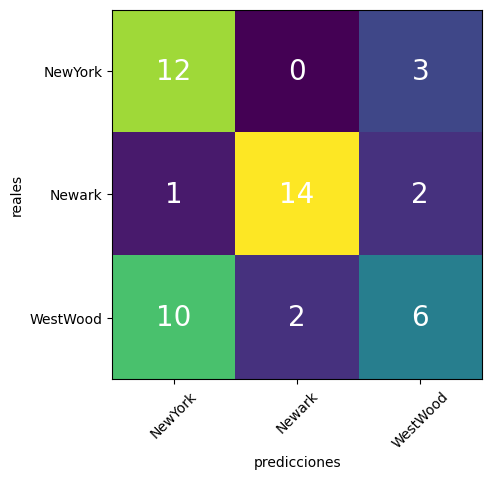

In [200]:
cont_table = st.contingency.crosstab(
  survey_test["lugar"],
  outputs[joint_predicted]
)

fig, axes = plt.subplots()

axes.imshow(
  cont_table[1]
)
axes.set_xlabel("predicciones")
axes.set_ylabel("reales")
axes.set_xticks([0, 1, 2])
axes.set_yticks([0, 1, 2])

for i, ns  in enumerate(cont_table[1]):
  for j, n  in enumerate(ns):
    axes.text(j, i, n, ha = "center", va="center", color="w", fontsize=20)

axes.set_yticklabels(cont_table[0][0])
axes.set_xticklabels(cont_table[0][0], rotation=45)